# Load shanghai tech dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.io import loadmat
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import time
import skimage.measure

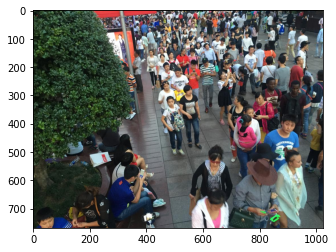

In [2]:
path = "./data/ShanghaiTech/part_B/train_data/images/"
for name in os.listdir(path = path):
    img = cv2.cvtColor(cv2.imread(path + name), cv2.COLOR_BGR2RGB)     
    break
  
_ = plt.imshow(img)

Number of people: 233


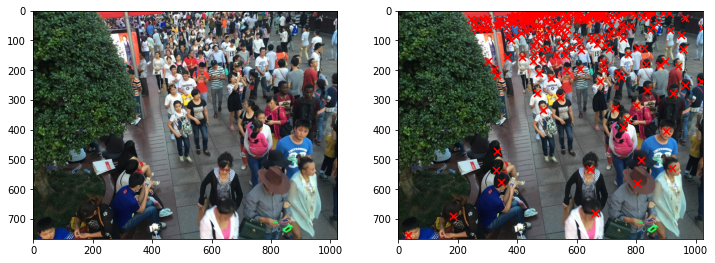

In [3]:
path = "./data/ShanghaiTech/part_B/train_data/ground-truth/"
for name in os.listdir(path = path):
    heads = loadmat(path + name)
    break

    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img)
print(f"Number of people: {len(heads['image_info'][0, 0][0, 0][0])}")

for x,y in heads["image_info"][0, 0][0, 0][0]:
    plt.scatter(round(x),round(y), s = 50, marker = "x", color = "r")

In [4]:
def density_map(image, heads):
    output = np.zeros(image.shape[:-1])
    x = heads["image_info"][0, 0][0, 0][0][:,0]
    y = heads["image_info"][0, 0][0, 0][0][:,1]
    
    for x_choord, y_choord in zip(x, y):
        density_i = np.zeros(image.shape[:-1])
        try:
            density_i[round(y_choord),round(x_choord)] = 1
        except:
            pass
        nearest_distance = np.min(np.linalg.norm(x_choord - y_choord))
        sigma = 0.3 * nearest_distance # beta = 0.3 suggested by MCNN paper
        kernel_size = 3
            
        density_i = cv2.GaussianBlur(density_i, (kernel_size,kernel_size), sigma)
        output += density_i
    return cv2.GaussianBlur(output, (51,51), sigma)

start = time.time()
ds_map = density_map(img, heads)
print(f"Time: {time.time() - start}")

Time: 2.4864418506622314


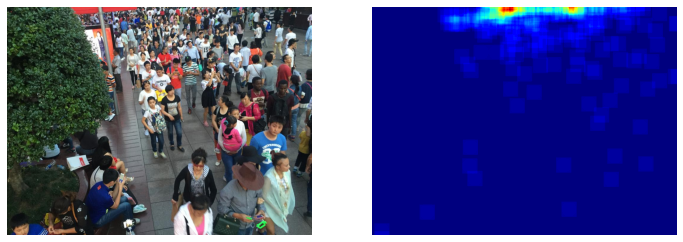

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.axis("off")
_=plt.imshow(ds_map , cmap = cm.jet)

## Downsampled version

In [6]:
def density_map_1_over_8(image, heads):
    image = skimage.measure.block_reduce(image, (2,2,1), np.max)
    image = skimage.measure.block_reduce(image, (2,2,1), np.max)
    image = skimage.measure.block_reduce(image, (2,2,1), np.max)
    
    output = np.zeros(image.shape[:-1])
    x = heads["image_info"][0, 0][0, 0][0][:,0]/8
    y = heads["image_info"][0, 0][0, 0][0][:,1]/8
    
    for x_choord, y_choord in zip(x, y):
        density_i = np.zeros(image.shape[:-1])
        try:
            density_i[round(y_choord),round(x_choord)] = 1
        except:
            pass
        nearest_distance = np.min(np.linalg.norm(x_choord - y_choord))
        sigma = 0.3 * nearest_distance # beta = 0.3 suggested by MCNN paper
        kernel_size = 3
            
        density_i = cv2.GaussianBlur(density_i, (kernel_size,kernel_size), sigma)
        output += density_i
    return cv2.GaussianBlur(output, (5,5), sigma)

start = time.time()
ds_map = density_map_1_over_8(img, heads)
print(f"Time: {time.time() - start}")

Time: 0.14278841018676758


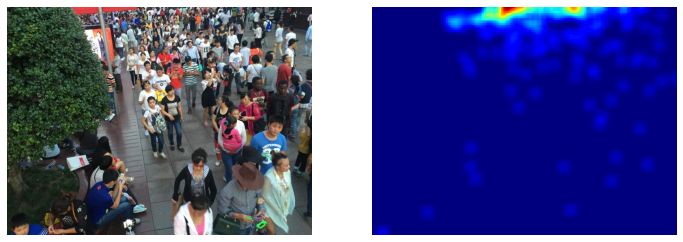

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.axis("off")
_=plt.imshow(ds_map, cmap = cm.jet)

# Conversion

Train:

In [8]:
path_images = "./data/ShanghaiTech/part_B/train_data/images/"
path_heads = "./data/ShanghaiTech/part_B/train_data/ground-truth/"
path_save = "./data/ShanghaiTech/part_B/train_data/maps/"

for i, (img_name, heads_name) in enumerate(zip(os.listdir(path = path_images), os.listdir(path = path_heads))):   
    img = cv2.cvtColor(cv2.imread(path_images + img_name), cv2.COLOR_BGR2RGB)  
    heads = loadmat(path_heads + heads_name)
    ds_map_1o8 = density_map_1_over_8(img, heads)
    np.save(path_save + img_name[:-4], ds_map_1o8)
    
    if i % 10 == 0:
        print(f"{i+1} density maps done")

1 density maps done
11 density maps done
21 density maps done
31 density maps done
41 density maps done
51 density maps done
61 density maps done
71 density maps done
81 density maps done
91 density maps done
101 density maps done
111 density maps done
121 density maps done
131 density maps done
141 density maps done
151 density maps done
161 density maps done
171 density maps done
181 density maps done
191 density maps done
201 density maps done
211 density maps done
221 density maps done
231 density maps done
241 density maps done
251 density maps done
261 density maps done
271 density maps done
281 density maps done
291 density maps done
301 density maps done
311 density maps done
321 density maps done
331 density maps done
341 density maps done
351 density maps done
361 density maps done
371 density maps done
381 density maps done
391 density maps done


Test:


In [9]:
path_images = "./data/ShanghaiTech/part_B/test_data/images/"
path_heads = "./data/ShanghaiTech/part_B/test_data/ground-truth/"
path_save = "./data/ShanghaiTech/part_B/test_data/maps/"

for i, (img_name, heads_name) in enumerate(zip(os.listdir(path = path_images), os.listdir(path = path_heads))):   
    img = cv2.cvtColor(cv2.imread(path_images + img_name), cv2.COLOR_BGR2RGB)  
    heads = loadmat(path_heads + heads_name)
    ds_map_1o8 = density_map_1_over_8(img, heads)
    np.save(path_save + img_name[:-4], ds_map_1o8)
    
    if i % 10 == 0:
        print(f"{i+1} density maps done")

1 density maps done
11 density maps done
21 density maps done
31 density maps done
41 density maps done
51 density maps done
61 density maps done
71 density maps done
81 density maps done
91 density maps done
101 density maps done
111 density maps done
121 density maps done
131 density maps done
141 density maps done
151 density maps done
161 density maps done
171 density maps done
181 density maps done
191 density maps done
201 density maps done
211 density maps done
221 density maps done
231 density maps done
241 density maps done
251 density maps done
261 density maps done
271 density maps done
281 density maps done
291 density maps done
301 density maps done
311 density maps done


## Print some

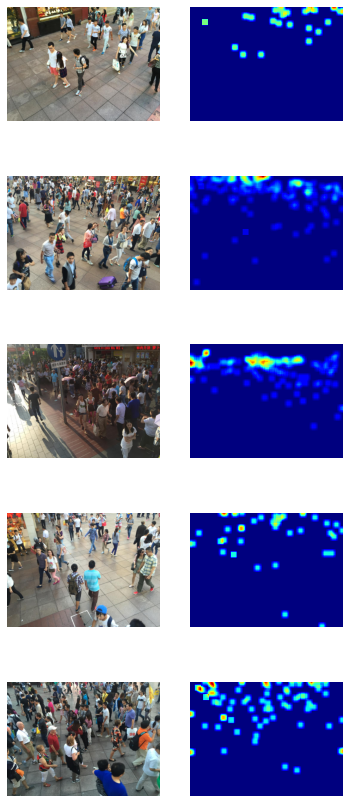

In [10]:
to_print = 5
plt.figure(figsize=(6, 3 * to_print))

for i, (img_name, den_name) in enumerate(zip(os.listdir(path = path_images), os.listdir(path = path_save))):   
    if i == to_print: break
            
    img = cv2.cvtColor(cv2.imread(path_images + img_name), cv2.COLOR_BGR2RGB)
    ds_map_1o8 = np.load(path_save + den_name)
    
    plt.subplot(to_print, 2, i * 2 + 1)
    plt.axis("off")
    plt.imshow(img)
    plt.subplot(to_print, 2, (i+1) * 2)
    plt.axis("off")
    plt.imshow(ds_map_1o8 , cmap = cm.jet)